<center> <h1> Teoria de Juegos
 (Modelado Computacional de Sistembas Biológicos )
 </h1> </center>
<center> <h4> Tarea: Árboles de  expansión minima / Matriz de aydasencia del ejercicio dado en clase</h4> </center>

<center> <h3> Profesores: Dr. Matías Alvarado, Dr.Sergio Alcalá Corona

 Departamento de Computación, CINVESTAV
 </h3> </center>
 



<center> <h3> Moises Omar León PIenda </h3> </center>
 


# Arboles de expansión mínima 

El árbol de expansión mínima es apropiado para problemas en los cuales la redundancia es expansiva, o el flujo a lo largo de los arcos se considera instantáneo. 

El problema surge cuando todos los nodos de una red deben conectarse entre ellos sin formar un ciclo. La aplicación de estos problemas de optimización se ubica en las redes de comunicación eléctrica, telefónica, carretera, ferroviaria, aérea, marítima, hidráulica o de gas, etc. donde los nodos representan puntos de consumo eléctrico, teléfonos, aeropuertos, computadoras y los arcos podrían ser de alta tensión, cable de fibra óptica, rutas aéreas, agua, gas etc.. 

También se le conoce como árbol generador mínimo, es una red conexa y ponderada que se refiere a utilizar los arcos de la red para llegar a todos los nodos de esta, de manera tal que se minimiza la longitud total. Para su solución se emplean los algoritmos de Prim y Kruskal

## Algoritmo de Krustal

1. Comience seleccionando el arco de menor longitud. 
2. En cada iteración agregue el siguiente arco de menor longitud del conjunto de arcos disponibles, teniendo la precaución de no formar ningún ciclo. 
3. El algoritmo finalizará cuando todos los arcos estén conectados. Si N= número de nodos entonces la solución optima debe incluir n-1 arcos.


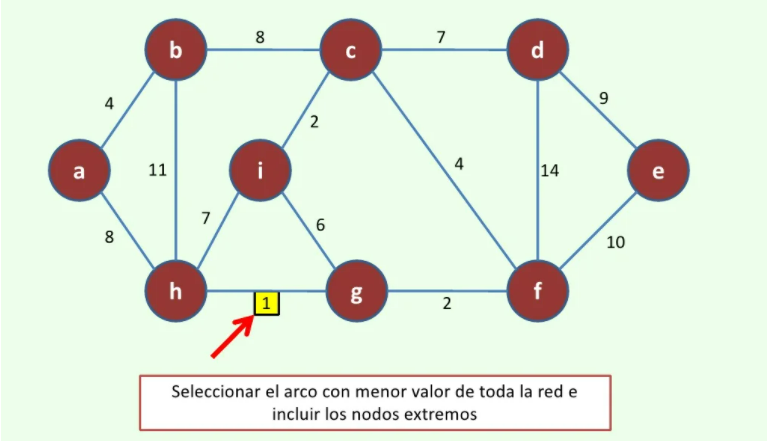

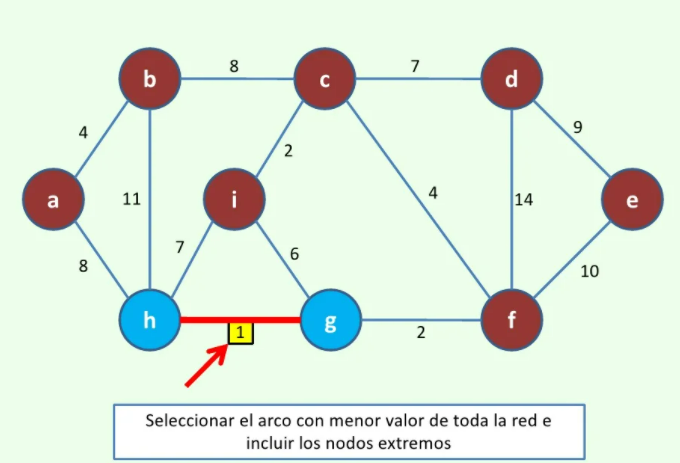


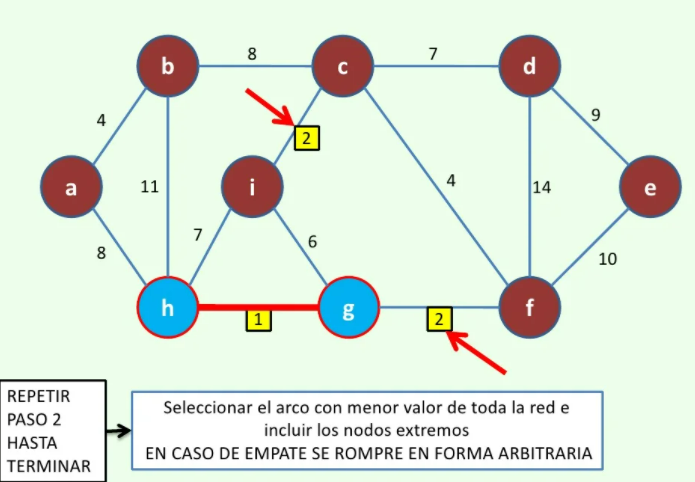

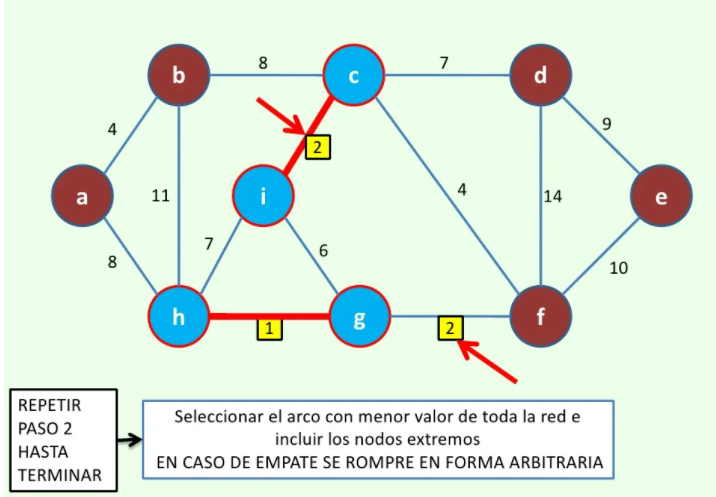


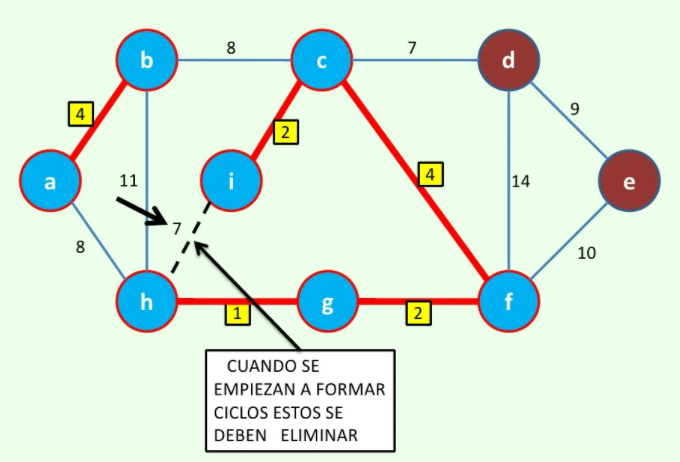

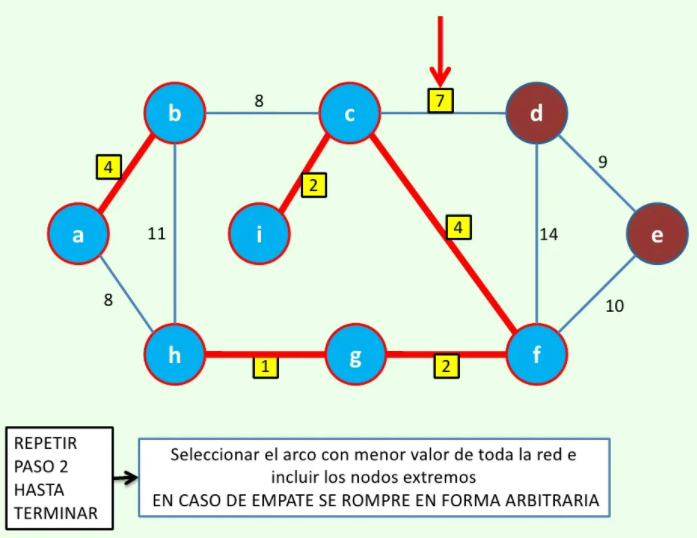

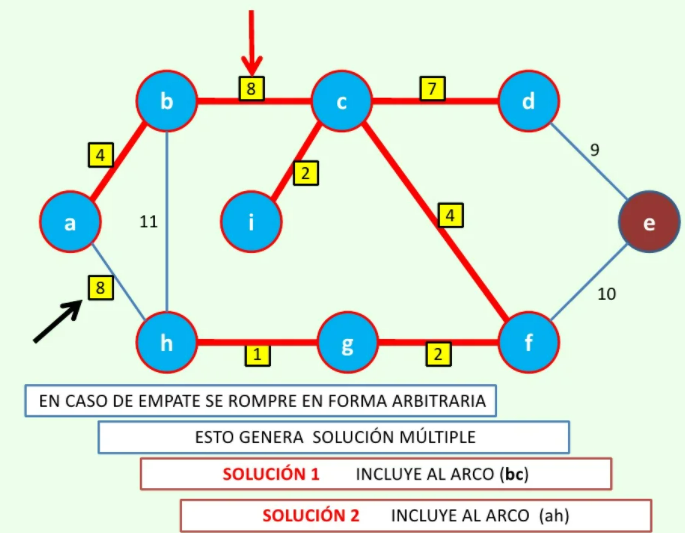

|Solucion  1| Solucion 2|
|---|---|
| 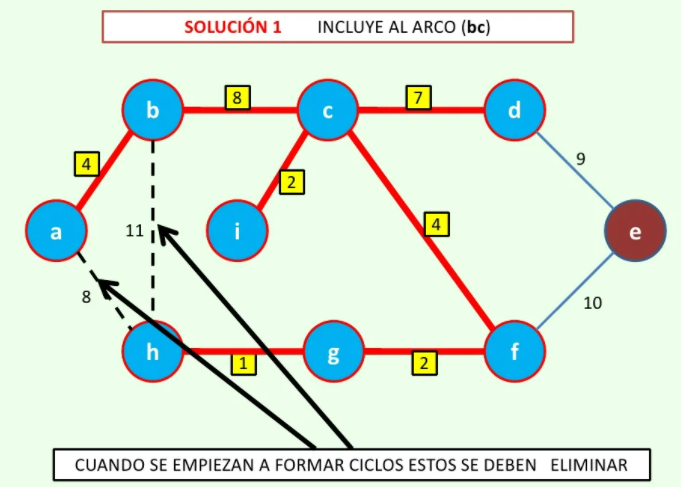 |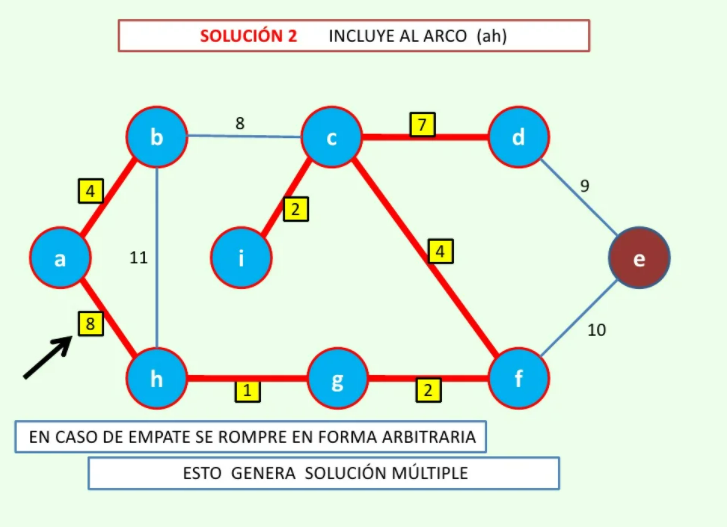 |
|---|---|
| 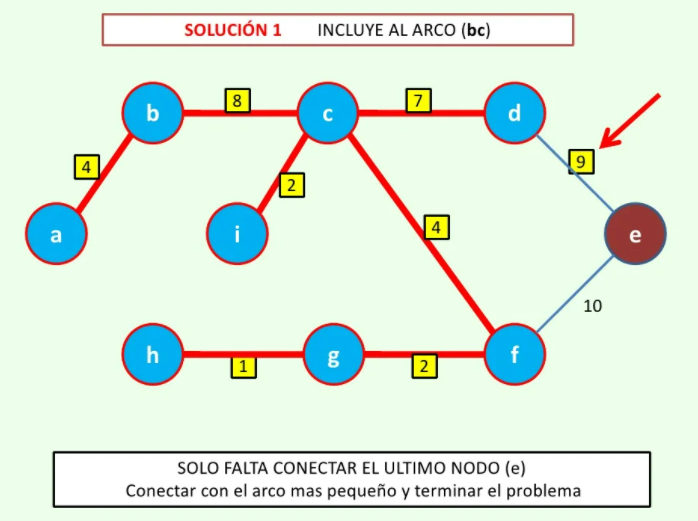 |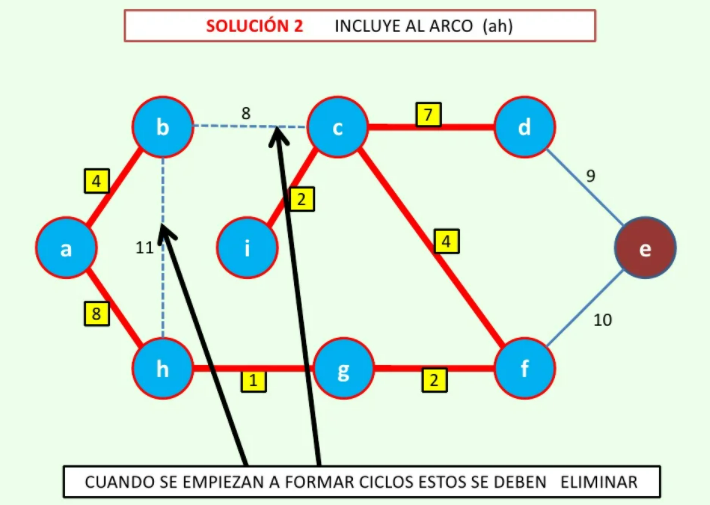 |
|---|---|
|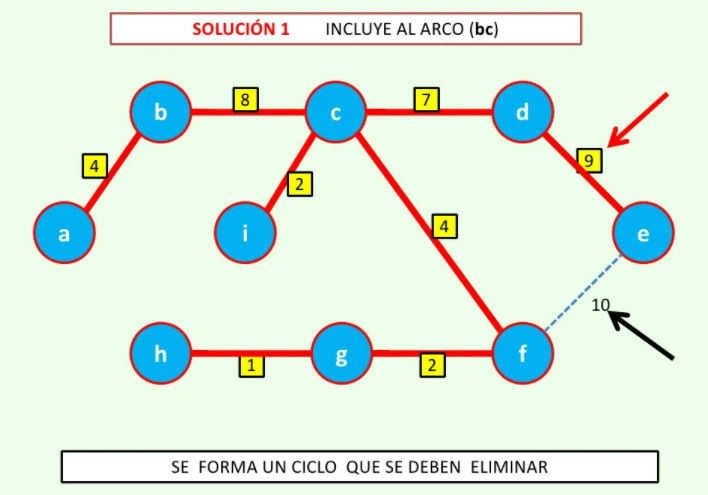 | 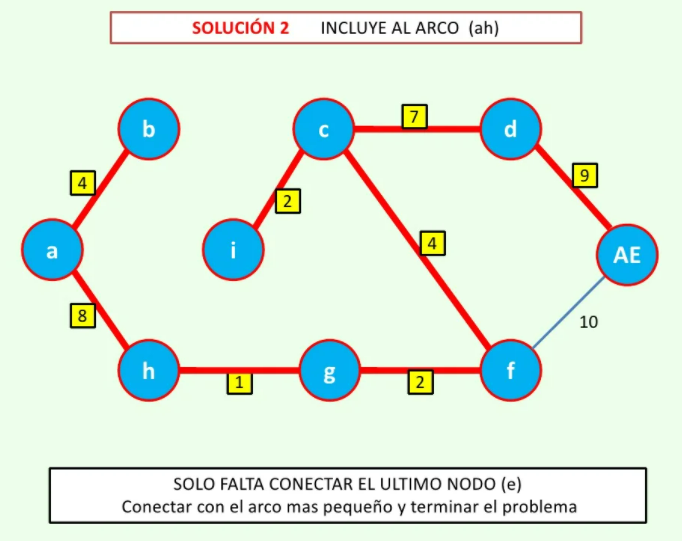 |
|---|---|
|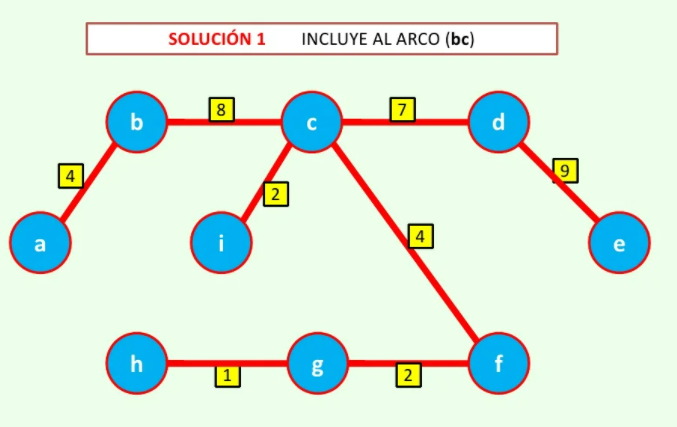 |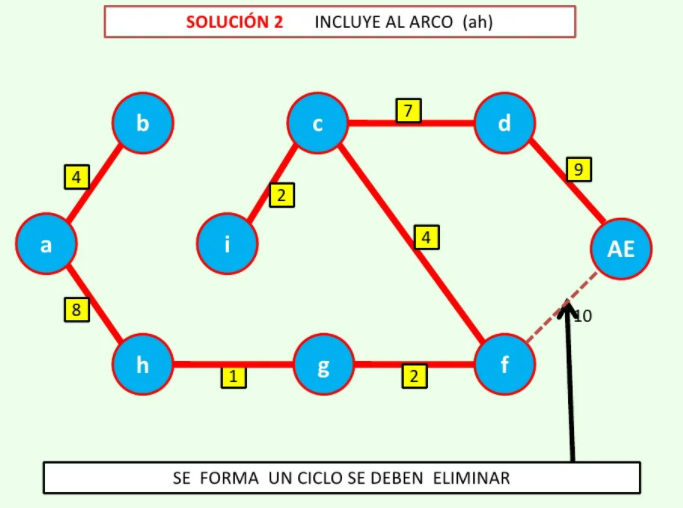 |
|---|---|
| 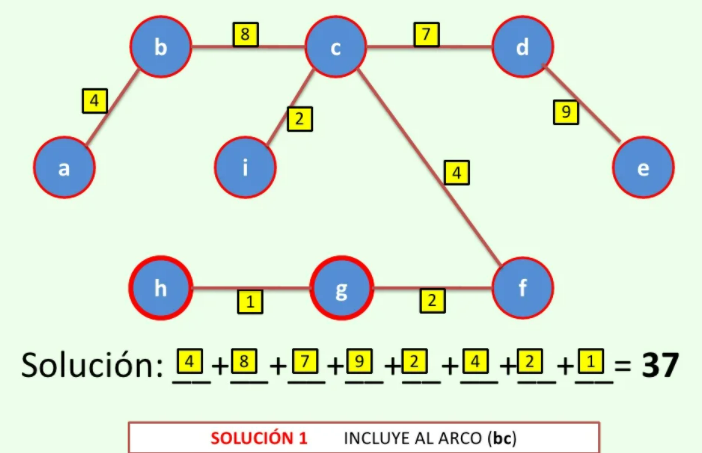|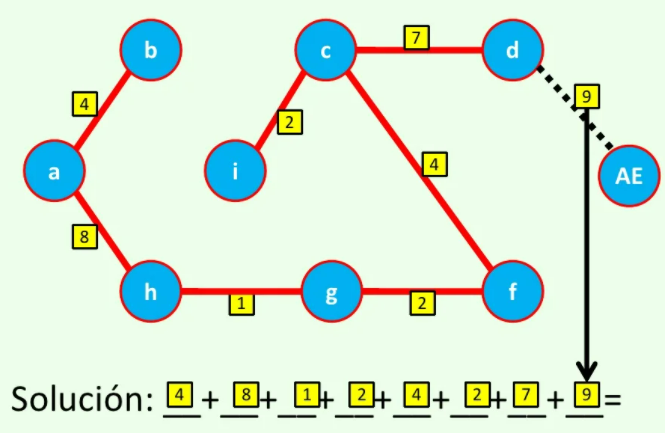 |
|---|---|

# Ejemplo

In [25]:
import os

Nodo = dict()
resultado = {}
conjuntos = []

def Make_set(vertice):
    Nodo[vertice] = vertice

def Find_set(vertice):
    if Nodo[vertice] != vertice:
        Nodo[vertice] = Find_set(Nodo[vertice])
    return Nodo[vertice]

def Union(u, v, Ordenada):
    '''print "Conjuntos separados:",u,v
    if u not in conjuntos:
        print u,"No existe en conjuntos"
        conjuntos.append(u)
    else:
        print u,"Si existe en conjuntos"
    if v not in conjuntos:
        print v,"No existe en conjuntos"
        conjuntos.append(v)
    else:
        print v,"Si existe en conjuntos"
    print "Conjuntos unidos:",conjuntos'''
    Dato1 = Find_set(u)
    Dato2 = Find_set(v)
    if Dato1 != Dato2:
        for Dato in Ordenada:
            Nodo[Dato1] = Dato2

def Kruskal(grafo):
    resultante = []
    cont = 0
    for vertice in grafo['A']:
        Make_set(vertice)

    Ordenada = list(grafo['B'])
    Ordenada.sort()
    Ordenada = [(a,b,c) for c,a,b in Ordenada]
    print ("==============================")
    print ("Datos Ordenados")
    print ("==============================")
    print ("Ordenados:",Ordenada)
    Ordenada = [(c,a,b) for a,b,c in Ordenada]
    for Dato in Ordenada:
        peso, u, v = Dato
        if Find_set(u) != Find_set(v):
            resultante.append(Dato)
            print ("==============================")
            print ("Paso:",cont)
            print ("==============================")
            resultante = [(a,b,c) for c,a,b in resultante]
            print ("Resultante: ",resultante)
            resultante = [(c,a,b) for a,b,c in resultante]
            cont+=1
            Union(u, v, Ordenada)

    return resultante

grafo = {
        'A': ['a','b','c','d','e','f','g','h','i','j','p'],
        'B': [(1, 'a', 'b'),
              (1, 'g', 'h'),
              (2, 'b', 'e'),
              (2, 'd', 'g'),
              (2, 'b', 'd'),
              (2, 'e', 'c'),
              (2, 'i', 'f'),
              (3, 'b', 'c'),
              (4, 'a', 'p'),
              (4, 'e', 'h'),
              (5, 'e', 'f'),
              (5, 'c', 'f'),
              (6, 'j', 'c'),
              (8, 'p', 'd'),
              (9, 'e', 'g'),
              (10, 'f', 'h'),
              (15, 'a', 'j'),
            ]
        }

resultante = Kruskal(grafo)
resultante = [(a,b,c) for c,a,b in resultante]
for origen,destino,peso in resultante:
    if origen in resultado:
        if destino in resultado:
            lista = resultado[origen]
            resultado[origen] = lista+[(destino,peso)]
            lista = resultado[destino]
            lista.append((origen,peso))
            resultado[destino] = lista
        else:
            resultado[destino] = [(origen,peso)]
            lista = resultado[origen]
            lista.append((destino,peso))
            resultado[origen] = lista
    elif destino in resultado:
        resultado[origen] = [(destino,peso)]
        lista = resultado[destino]
        lista.append((origen,peso))
        resultado[destino] = lista
    else:
         resultado[destino] = [(origen,peso)]
         resultado[origen] = [(destino,peso)]
print ("\n=========Resultados=========")
print ("Arbol de expansion minima:")
for key, lista in resultado.items():
    print (key)
    print (lista)
print ("==============================")
os.system("pause")

Datos Ordenados
Ordenados: [('a', 'b', 1), ('g', 'h', 1), ('b', 'd', 2), ('b', 'e', 2), ('d', 'g', 2), ('e', 'c', 2), ('i', 'f', 2), ('b', 'c', 3), ('a', 'p', 4), ('e', 'h', 4), ('c', 'f', 5), ('e', 'f', 5), ('j', 'c', 6), ('p', 'd', 8), ('e', 'g', 9), ('f', 'h', 10), ('a', 'j', 15)]
Paso: 0
Resultante:  [('a', 'b', 1)]
Paso: 1
Resultante:  [('a', 'b', 1), ('g', 'h', 1)]
Paso: 2
Resultante:  [('a', 'b', 1), ('g', 'h', 1), ('b', 'd', 2)]
Paso: 3
Resultante:  [('a', 'b', 1), ('g', 'h', 1), ('b', 'd', 2), ('b', 'e', 2)]
Paso: 4
Resultante:  [('a', 'b', 1), ('g', 'h', 1), ('b', 'd', 2), ('b', 'e', 2), ('d', 'g', 2)]
Paso: 5
Resultante:  [('a', 'b', 1), ('g', 'h', 1), ('b', 'd', 2), ('b', 'e', 2), ('d', 'g', 2), ('e', 'c', 2)]
Paso: 6
Resultante:  [('a', 'b', 1), ('g', 'h', 1), ('b', 'd', 2), ('b', 'e', 2), ('d', 'g', 2), ('e', 'c', 2), ('i', 'f', 2)]
Paso: 7
Resultante:  [('a', 'b', 1), ('g', 'h', 1), ('b', 'd', 2), ('b', 'e', 2), ('d', 'g', 2), ('e', 'c', 2), ('i', 'f', 2), ('a', 'p', 4)]

32512

# Matriz de adyasencia del ejercicio dado en clase


Dada la siguiente imagen


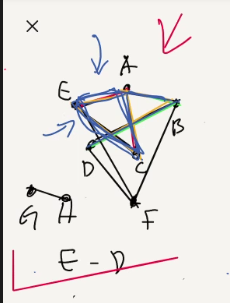



In [13]:
import numpy as np

matA=np.array([[0,1,1,0,1,0],
               [1,0,0,1,0,1],
               [1,0,0,0,1,0],
               [0,1,0,0,0,1],
               [1,0,1,0,0,1],
               [0,1,0,1,1,0]])

print  ("La matriz adyaceadyacente del conjunto de puntos dados es: ")
print (matA)



La matriz adyaceadyacente del conjunto de puntos dados es: 
[[0 1 1 0 1 0]
 [1 0 0 1 0 1]
 [1 0 0 0 1 0]
 [0 1 0 0 0 1]
 [1 0 1 0 0 1]
 [0 1 0 1 1 0]]


### Elevada al cuadrado

Para elvarla al cuadrado tenemos que

A^2= A*A , de tal modo que 
\begin{equation}
A^2=
\begin{bmatrix}
0 & 1 & 1 & 0 & 1 & 0\\
1 & 0 & 0 & 1 & 0 & 1\\
1 & 0 & 0 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 1\\
1 & 0 & 1 & 0 & 0 & 1\\
0 & 1 & 0 & 1 & 1 & 0\\
\end{bmatrix} *  
\begin{bmatrix}
0 & 1 & 1 & 0 & 1 & 0\\
1 & 0 & 0 & 1 & 0 & 1\\
1 & 0 & 0 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 1\\
1 & 0 & 1 & 0 & 0 & 1\\
0 & 1 & 0 & 1 & 1 & 0\\
\end{bmatrix}
\end{equation} 


In [14]:
# elevar matrices a la n potencia con NumPy


import numpy as np

print ("El cuadrado de la matriz es:")

matA2 = np.linalg.matrix_power(matA, 2)
print(matA2)


El cuadrado de la matriz es:
[[3 0 1 1 1 2]
 [0 3 1 1 2 1]
 [1 1 2 0 1 1]
 [1 1 0 2 1 1]
 [1 2 1 1 3 0]
 [2 1 1 1 0 3]]


### Elevada al cubo

Elevada al cubo nos queda de la forma
\begin{equation}
A^3=
\begin{bmatrix}
3 & 0 & 1 & 1 & 1 & 2\\
0 & 3 & 1 & 1 & 2 & 1\\
1 & 1 & 2 & 0 & 1 & 1\\
1 & 1 & 0 & 2 & 1 & 1\\
1 & 2 & 1 & 1 & 3 & 0\\
2 & 1 & 1 & 1 & 0 & 3\\
\end{bmatrix}
 *  
\begin{bmatrix}
0 & 1 & 1 & 0 & 1 & 0\\
1 & 0 & 0 & 1 & 0 & 1\\
1 & 0 & 0 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 1\\
1 & 0 & 1 & 0 & 0 & 1\\
0 & 1 & 0 & 1 & 1 & 0\\
\end{bmatrix} 
\end{equation} 

In [17]:
# elevar matrices a la n potencia con NumPy

import numpy as np

print ("El cubo de la matriz es:")

matA2 = np.linalg.matrix_power(matA, 3)
print(matA2)

El cubo de la matriz es:
[[2 6 4 2 6 2]
 [6 2 2 4 2 6]
 [4 2 2 2 4 2]
 [2 4 2 2 2 4]
 [6 2 4 2 2 6]
 [2 6 2 4 6 2]]



Se puede notar que no se obtiene alguna matriz nula o de identidad pero al menos siguen siendo simétricas 



In [19]:
# elevar matrices a la n potencia con NumPy

import numpy as np

print ("la matriz elevada a la potencia 10 es :")

matA2 = np.linalg.matrix_power(matA, 10)
print(matA2)

la matriz elevada a la potencia 10 es :
[[4832 4304 3344 3344 4320 4816]
 [4304 4832 3344 3344 4816 4320]
 [3344 3344 2464 2432 3344 3344]
 [3344 3344 2432 2464 3344 3344]
 [4320 4816 3344 3344 4832 4304]
 [4816 4320 3344 3344 4304 4832]]
